In [77]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [79]:
# 1. Cargar y explorar los datos
data = pd.read_csv('D:\\UNAD_ANDRES\\Titanic-Dataset.csv')

In [81]:
# Mostrar las primeras filas para revisar la estructura
print("Primeras filas del dataset:")
print(data.head())

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

In [83]:
# Resumen estadístico
print("\nResumen estadístico:")
print(data.describe())


Resumen estadístico:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [85]:
# Información general del dataset
print("\nInformación general:")
print(data.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


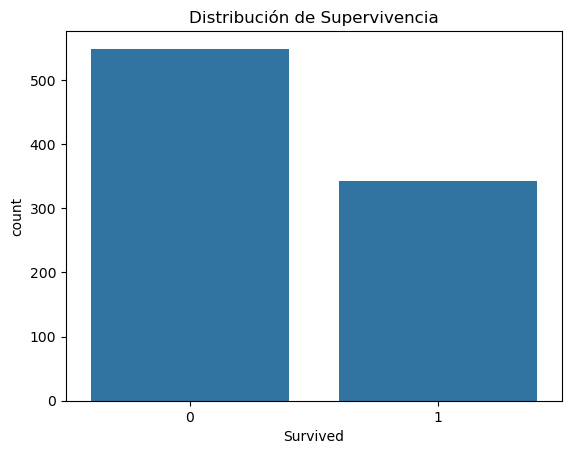

In [87]:
# 2. Análisis exploratorio de los datos
# Distribución de supervivencia
sns.countplot(data=data, x='Survived')
plt.title('Distribución de Supervivencia')
plt.show()

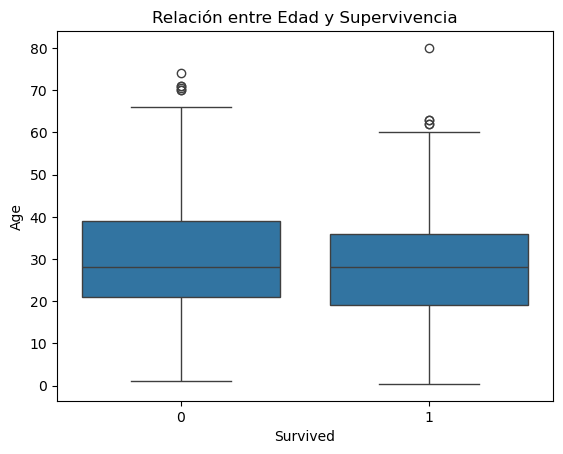

In [89]:
    # Relación entre edad y supervivencia
sns.boxplot(data=data, x='Survived', y='Age')
plt.title('Relación entre Edad y Supervivencia')
plt.show()

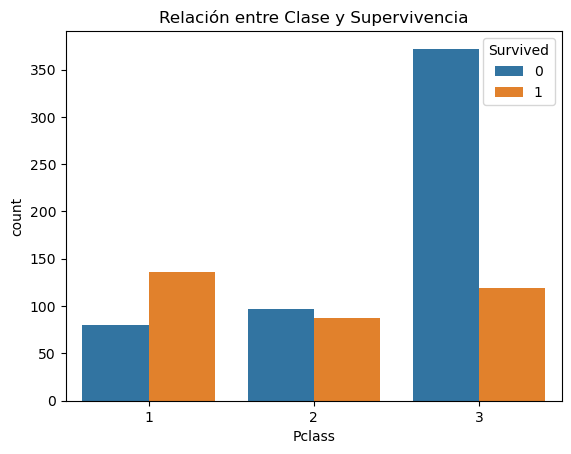

In [91]:
# Relación entre clase de pasajero y supervivencia
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Relación entre Clase y Supervivencia')
plt.show()

In [93]:
# 3. Preprocesamiento de datos
# Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())


Valores nulos por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [95]:
# Llenar valores faltantes en la columna 'Age' con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

In [97]:
# Eliminar filas con valores nulos en otras columnas relevantes
data.dropna(subset=['Embarked'], inplace=True)

In [99]:
# Convertir variables categóricas a numéricas
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [101]:
# 4. Selección de características
# Seleccionar columnas relevantes
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

In [103]:
# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# 6. Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [107]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [109]:
# Convertir las predicciones a valores binarios (0 o 1)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

In [111]:
# 7. Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMétricas del modelo:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R2 Score: {r2}")


Métricas del modelo:
Mean Squared Error (MSE): 0.1460931727183058
Mean Absolute Error (MAE): 0.29129904854752997
R2 Score: 0.3845477882719319


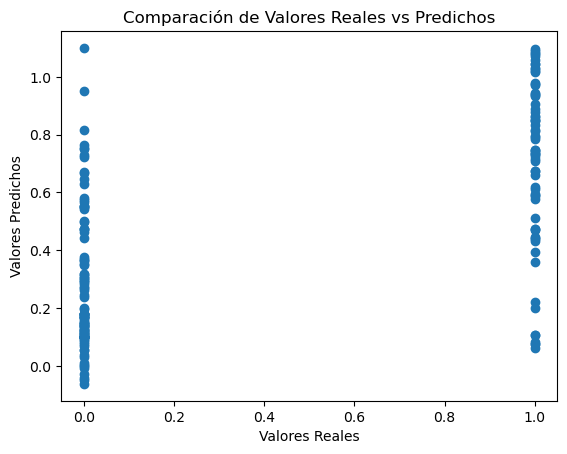

In [113]:
# 8. Gráficas de evaluación
# Comparación de valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación de Valores Reales vs Predichos')
plt.show()

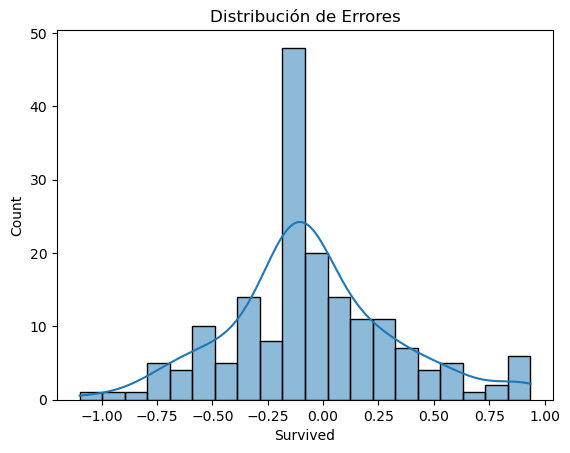

In [115]:
# Histograma de errores
errors = y_test - y_pred
sns.histplot(errors, bins=20, kde=True)
plt.title('Distribución de Errores')
plt.show()